In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# prepare dataset

In [15]:
raw_data = pd.read_csv('./amazon_reviews_us_Office_Products_v1_00.tsv', sep='\t',error_bad_lines=False)

C:\Users\monkeydc\.conda\envs\561\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 20773: expected 15 fields, saw 22\nSkipping line 39834: expected 15 fields, saw 22\nSkipping line 52957: expected 15 fields, saw 22\nSkipping line 54540: expected 15 fields, saw 22\n'
b'Skipping line 80276: expected 15 fields, saw 22\nSkipping line 96168: expected 15 fields, saw 22\nSkipping line 96866: expected 15 fields, saw 22\nSkipping line 98175: expected 15 fields, saw 22\nSkipping line 112539: expected 15 fields, saw 22\nSkipping line 119377: expected 15 fields, saw 22\nSkipping line 120065: expected 15 fields, saw 22\nSkipping line 124703: expected 15 fields, saw 22\n'
b'Skipping line 134024: expected 15 fields, saw 22\nSkipping line 153938: expected 15 fields, saw 22\nSkipping line 156225: expected 15 fields, saw 22

In [16]:
columns = ['review_body', 'star_rating']
raw_review_rating =  raw_data[columns]

In [26]:
values_to_stratify = [1,2,3,4,5]

def stratified_sample(group, n=50001):
    return group.sample(n=n, random_state=1)



sampled_data = raw_review_rating[raw_review_rating['star_rating'].isin(values_to_stratify)].groupby('star_rating', group_keys=False).apply(stratified_sample)

sampled_data = sampled_data[sampled_data['review_body'].apply(lambda x: isinstance(x, str))]

Text(0, 0.5, 'Frequency')

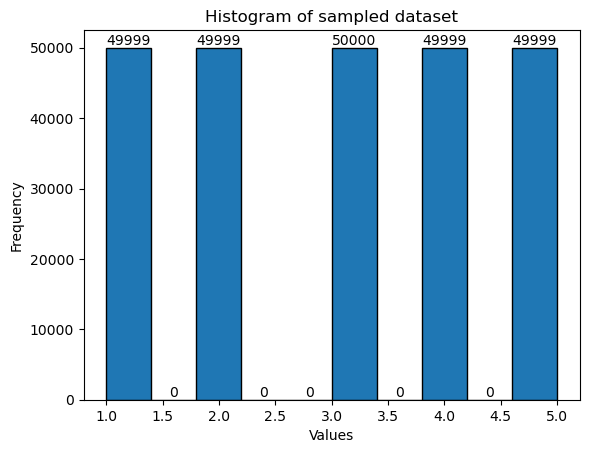

In [25]:
ax = sampled_data['star_rating'].plot(kind='hist', bins=10, edgecolor='black')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Histogram of sampled dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')

In [27]:
values_to_stratify = [1,2,3,4,5]

def stratified_sample(group, n=50000):
    return group.sample(n=n, random_state=1)



sampled_data = sampled_data[sampled_data['star_rating'].isin(values_to_stratify)].groupby('star_rating', group_keys=False).apply(stratified_sample)

sampled_data = sampled_data[sampled_data['review_body'].apply(lambda x: isinstance(x, str))]

Text(0, 0.5, 'Frequency')

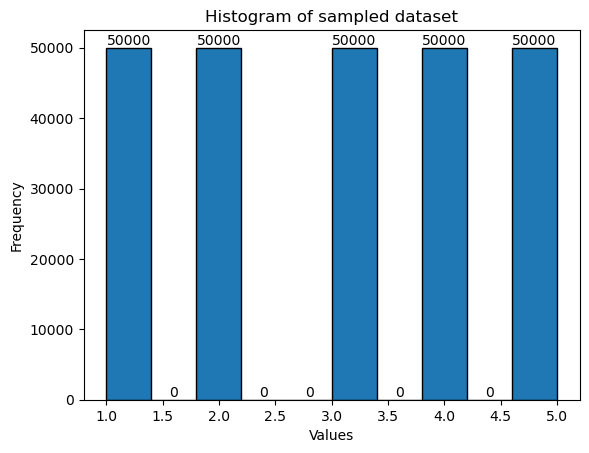

In [28]:
ax = sampled_data['star_rating'].plot(kind='hist', bins=10, edgecolor='black')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Histogram of sampled dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')

In [29]:
sampled_data.to_csv('dataset.csv', index=False)